In [1]:
import phoebe
import numpy as np
from phoebe import u
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: how to save?
import pickle
from models import PhoebeModel

with open('test_single_sun.pickle', 'rb') as f:
    b = pickle.load(f)
    
from spectrum import *
import jax.numpy as jnp
import jax

Models defined.


In [2]:
m = PhoebeModel(n_triangles=2000,
                mass=1.0,
                radius=1.0,
                teff=6000.,
                timestamps=jnp.linspace(0., 100., 50))

# Mass, radius - in solar units
# Timestamps - in days

100%|██████████| 50/50 [00:00<00:00, 53.86it/s]


In [3]:
coords = m.centers
los_vels = m.get_los_velocities()

In [4]:
# Coordinates are returned for all timestamps
coords.shape

(50, 2276, 3)

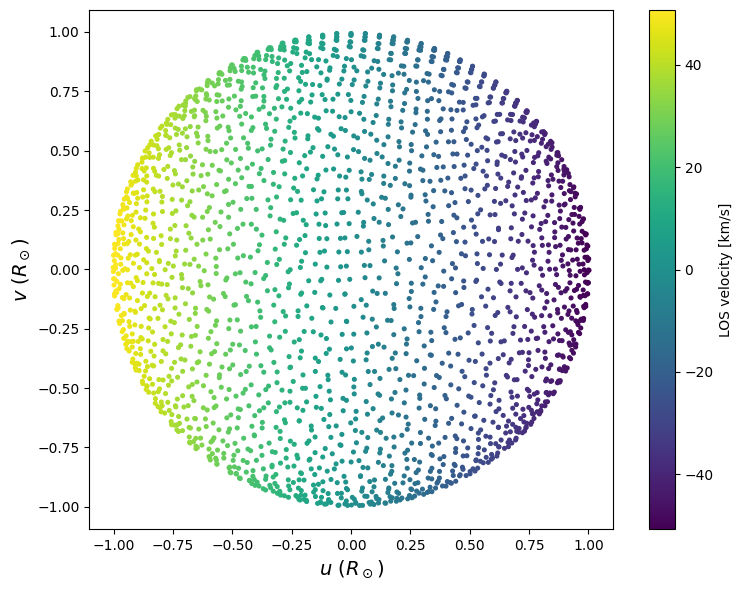

In [5]:
plt.figure(figsize=(8,6))
plt.gca().set_aspect('equal')
plt.scatter(coords[0, :, 0], coords[0, :, 1], marker='o',c=los_vels[0],s=7)
plt.xlabel(r'$u$ ($R_\odot$)',fontsize=14)
plt.ylabel(r'$v$ ($R_\odot$)',fontsize=14)
plt.colorbar(label=r'LOS velocity [km/s]')
plt.tight_layout()
plt.show()

In [8]:
LOG_WAVELENGTHS = jnp.linspace(jnp.log10(5885), jnp.log10(5895), 500)
atmo = m.model_spectrum(m.timestamps[0], LOG_WAVELENGTHS, 0.5*np.ones((1, 20)))

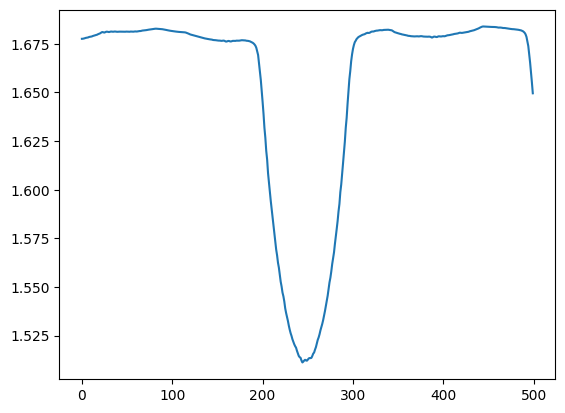

In [11]:
plt.plot(atmo[0])